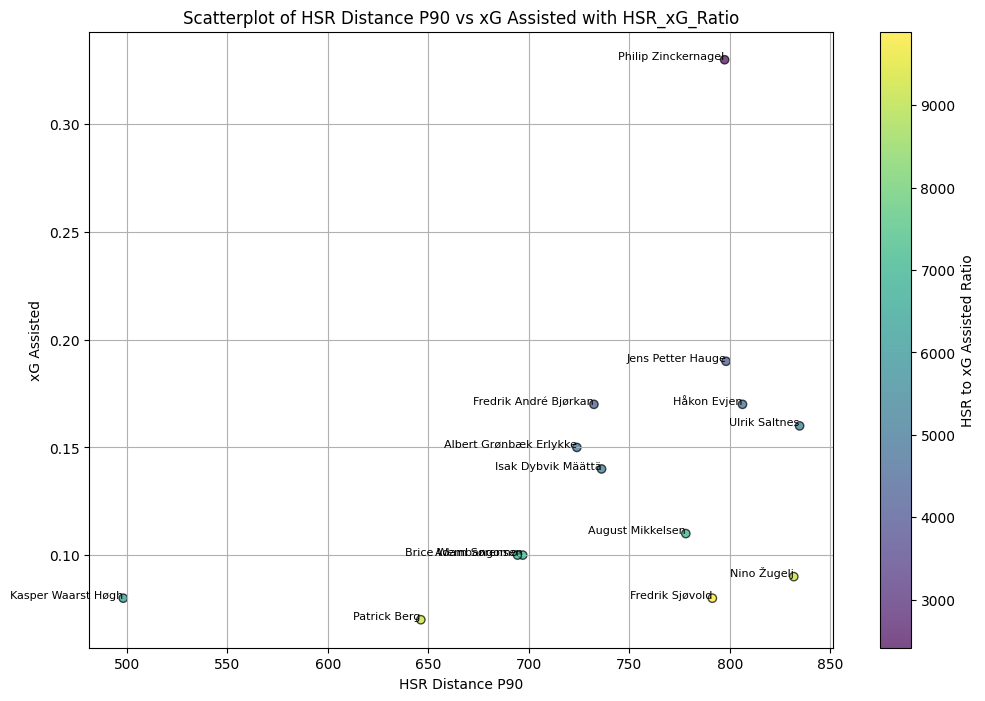

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files with the correct delimiter
file1 = '/Users/marclambertes/Downloads/DB2425/SkillCorner-2025-01-01.csv'
file2 = '/Users/marclambertes/Downloads/DB2425/player_stats (1).csv'

# Re-parse data1 with the correct delimiter
data1 = pd.read_csv(file1, delimiter=';')
data2 = pd.read_csv(file2)

# Strip whitespace from column names
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

# Rename 'Name' column in data2 to 'Player'
data2.rename(columns={'Name': 'Player'}, inplace=True)

# Merge the dataframes on the 'Player' column
merged_data = pd.merge(data1, data2, on='Player', how='inner')

# Create a new metric: Ratio of HSR Distance P90 to xG Assisted
merged_data['HSR_xG_Ratio'] = merged_data['HSR Distance P90'] / merged_data['xG Assisted']

# Extract the metrics
x = merged_data['HSR Distance P90']
y = merged_data['xG Assisted']
labels = merged_data['Player']
new_metric = merged_data['HSR_xG_Ratio']

# Create the scatterplot, color-coded by the new metric
plt.figure(figsize=(12, 8))
sc = plt.scatter(x, y, c=new_metric, cmap='viridis', alpha=0.7, edgecolors='k')

# Add a color bar for the new metric
cbar = plt.colorbar(sc)
cbar.set_label('HSR to xG Assisted Ratio')

# Add labels to each point
for i, label in enumerate(labels):
    plt.text(x.iloc[i], y.iloc[i], label, fontsize=8, ha='right')

# Add labels and title
plt.xlabel('HSR Distance P90')
plt.ylabel('xG Assisted')
plt.title('Scatterplot of HSR Distance P90 vs xG Assisted with HSR_xG_Ratio')

# Show the plot
plt.grid(True)
plt.show()


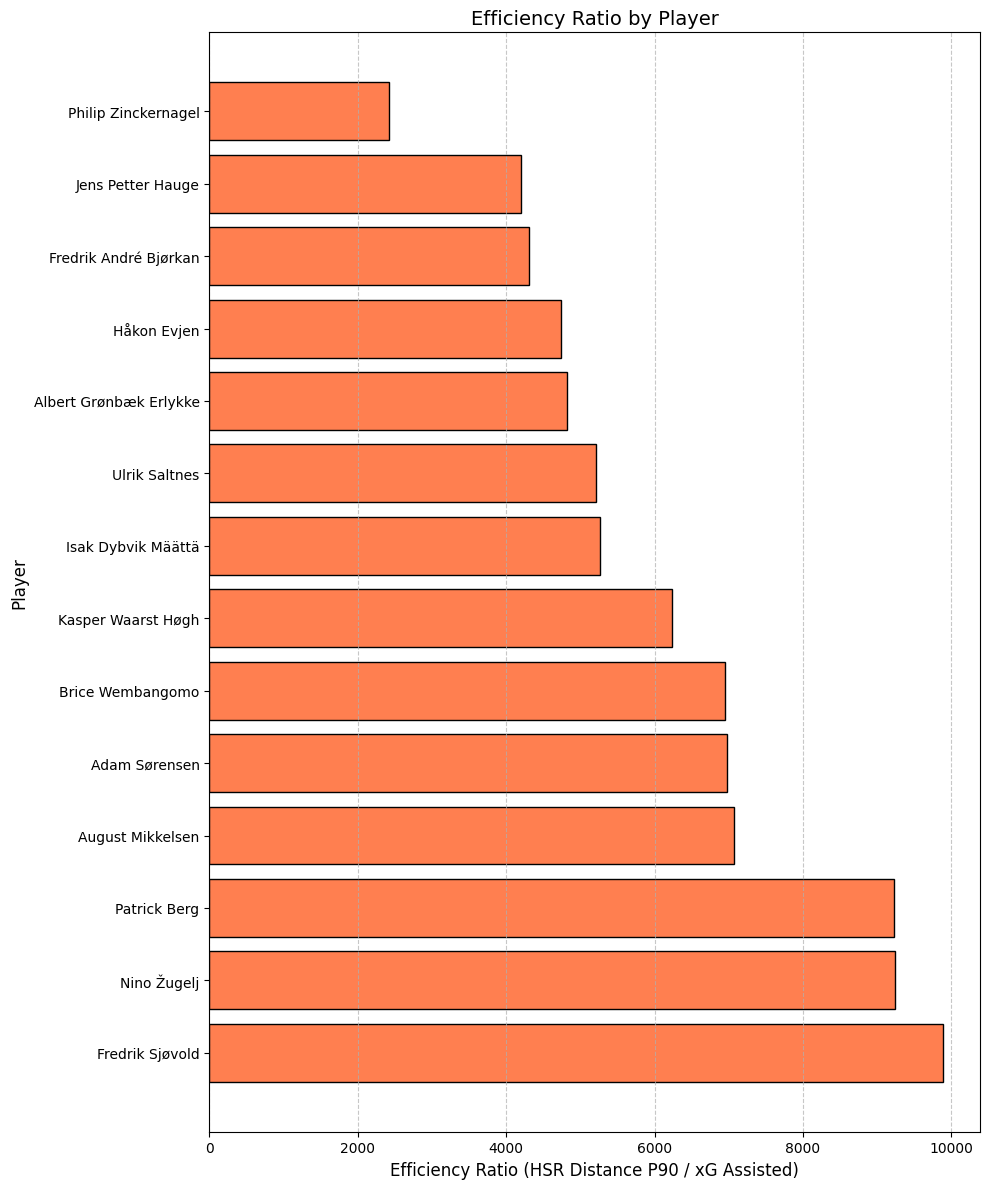

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files with the correct delimiter
file1 = '/Users/marclambertes/Downloads/DB2425/SkillCorner-2025-01-01.csv'
file2 = '/Users/marclambertes/Downloads/DB2425/player_stats (1).csv'

# Re-parse data1 with the correct delimiter
data1 = pd.read_csv(file1, delimiter=';')
data2 = pd.read_csv(file2)

# Strip whitespace from column names
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

# Rename 'Name' column in data2 to 'Player'
data2.rename(columns={'Name': 'Player'}, inplace=True)

# Merge the dataframes on the 'Player' column
merged_data = pd.merge(data1, data2, on='Player', how='inner')

# Create a new metric: Efficiency Ratio
merged_data['Efficiency Ratio'] = merged_data['HSR Distance P90'] / merged_data['xG Assisted']

# Sort the data by the new metric for better visualization
merged_data.sort_values('Efficiency Ratio', ascending=False, inplace=True)

# Create the horizontal bar graph
plt.figure(figsize=(10, 12))
plt.barh(merged_data['Player'], merged_data['Efficiency Ratio'], color='coral', edgecolor='k')

# Add labels and title
plt.xlabel('Efficiency Ratio (HSR Distance P90 / xG Assisted)', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.title('Efficiency Ratio by Player', fontsize=14)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
